# **시계열 분석 실습 과제**

기수:22기
이름:진민찬

이 과제는 ARIMA 모델을 활용하여 2014년 6월 1일부터 2024년 6월 1일까지의 주가 데이터를 분석하고 예측하는 과정으로 구성되어 있습니다.

각 단계에서 필요한 코드를 실행하고, 빈칸을 채워 과제를 완성하세요.

---



- DataReader([종목정보],[데이터소스],[시작일],[종료일])
    - High(최고가)
    - Low(최저가)
    - Open(시가)
    - Close(종가)
    - Volume(거래량)
    - Adj Close (수정종가;분할,배당,배분,신주 발생이 된 경우를 고려하여 주식가격을 조정해둔 가격)

In [1]:
!pip install yfinance pmdarima matplotlib
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 10.9 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.6 MB/s eta 0:00:00
Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 10.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 10.3 MB/s eta 0:00:0000:010:01
  Created wheel for peewee: filename=peewee-3.17.6-cp310-cp310-linux_x86_64.whl size=293646 sha256=732908730b5cf34cd6baf6e3ca36ceba37a38ec3751790c032aff1c0a82c26e7
  Stored in directory: /home/vision/.cache/pip/wheels/4b/b9/b0/83d6e258e8f963f5ff111a2cd8c483ca59372a86e6a2535212
Successfully built peewee


## **1. 주가 데이터 수집 및 초기 탐색**

### **목표**
- Google의 주가 데이터를 Yahoo Finance에서 수집하여 기본적인 탐색적 데이터 분석을 수행합니다. 데이터의 구조와 특성을 이해하고, 시계열 분석의 기초를 마련합니다.
---

- **시작일**: `2014-06-01`
- **종료일**: `2024-06-01`
- **종목**: `GOOG`
---

### **지시사항**:
- 2014년 6월 1일부터 2024년 6월 1일까지의 Google 주가 데이터를 Yahoo Finance에서 불러오세요.
- 데이터를 다운로드한 후, 데이터의 첫 5행을 출력하세요.
- 데이터의 기초 통계 요약(평균, 표준편차, 최소값, 최대값 등)을 출력하여 데이터의 특성을 확인하세요.



In [2]:
# 시작일, 종료일 설정
start = '2014-06-01'
end = '2024-06-01'

# 데이터 다운로드
data = yf.download("GOOG", start=start, end=end)

# 데이터 확인: 첫 5행 출력
print(data.head())

# 데이터의 통계적 요약 확인
print(data.describe())

[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2014-06-02  27.958241  27.968212  27.211790  27.620667  27.589272  28700582
2014-06-03  27.474070  27.541386  27.053225  27.172398  27.141512  37332215
2014-06-04  27.000870  27.355396  26.863747  27.158438  27.127567  36329469
2014-06-05  27.245197  27.671528  27.147964  27.619171  27.587778  33782496
2014-06-06  27.826603  27.826603  27.371351  27.740339  27.708807  34735104
              Open         High          Low        Close    Adj Close  \
count  2518.000000  2518.000000  2518.000000  2518.000000  2518.000000   
mean     74.181322    74.974861    73.452102    74.235356    74.150976   
std      39.945654    40.415505    39.536635    39.986349    39.940898   
min      24.664783    24.730902    24.311253    24.560070    24.532154   
25%      39.264999    39.561639    39.141300    39.316500    39.271811   
50%      59.266251    59

#### **참고사항**

**Yahoo Finance에서 가져온 데이터의 'Adj Close'와 'Close'의 차이는 무엇인가요? 왜 'Adj Close'를 분석에 사용하는 것이 중요한가요?**

- 'Close'는 주식 시장이 마감할 때의 주가를 의미하며, 'Adj Close'(Adjusted Close)는 주식의 분할, 배당, 배분 등과 같은 주식 이벤트를 반영한 수정 종가입니다.
- 'Adj Close'를 사용하는 것이 중요한 이유는 시간이 지남에 따라 주식 가격의 변동이 발생할 수 있기 때문입니다.
- 수정 종가는 이러한 이벤트를 고려한 후의 가격을 반영하므로, 장기적인 시계열 분석에서는 'Adj Close'를 사용하는 것이 더 정확한 분석을 가능하게 합니다.

##  **2. 데이터 전처리 및 시각화**

- 목표: 목표: 데이터의 품질을 향상시키기 위해 불필요한 데이터를 제거하고, 시계열 데이터의 기본적인 특성(추세 및 변동성)을 시각적으로 탐색합니다.

**지시사항** :
- 거래량(Volume)이 0인 일자는 데이터를 제거하여 품질을 향상시키세요.
- 수정종가(Adj Close) 데이터를 사용하여 50일 이동평균(Rolling Mean)과 이동표준편차(Rolling Standard Deviation)를 계산하세요.
- 원본 데이터와 함께 이동평균과 이동표준편차를 시각화하고, 시각화 결과를 바탕으로 시계열 데이터의 추세와 변동성에 대해 논의하세요.


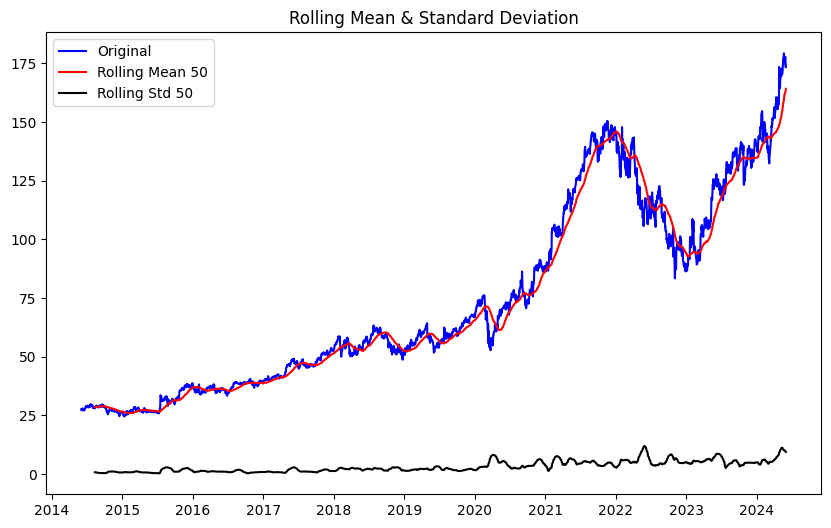

In [3]:
# 거래량이 0인 일자 제거 및 수정종가 데이터만 사용
data = data['Adj Close'][data['Volume'] != 0]

# 이동평균 및 이동표준편차 시각화 함수
def plot_rolling(data, interval):
    rolmean = data.rolling(interval).mean()
    rolstd = data.rolling(interval).std()
    plt.figure(figsize=(10, 6))
    plt.plot(data, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean {}'.format(interval))
    plt.plot(rolstd, color='black', label='Rolling Std {}'.format(interval))
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

# 50일치 이동평균 및 이동표준편차 계산
plot_rolling(data, interval=50)


## **3. 시계열 데이터의 정상성 확인 - ADF 테스트**

### **목표**
시계열 데이터의 정상성 여부를 확인합니다. 정상성은 예측 모델을 적용하기 위한 필수 조건으로, 데이터를 적절히 변환하여 예측 모델이 더 잘 작동할 수 있도록 합니다.

### **지시사항**:

- ADF(Augmented Dickey-Fuller) 테스트를 사용하여 원본 데이터의 정상성 여부를 확인하세요.
- 1차 차분 데이터를 생성하고, 1차 차분 데이터에 대해 ADF 테스트를 수행하여 정상성 여부를 확인하세요.
- ADF 테스트의 p-value 결과를 바탕으로, 원본 데이터와 1차 차분 데이터의 정상성 여부를 논의하세요.


In [4]:
# ADF 테스트 함수 정의
def adf_test(data):
    result = adfuller(data.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    return result[1]

# ADF 테스트 수행 - 원본 데이터
print("ADF Test - 원본 데이터")
p_value_original = adf_test(data)  # 원본 데이터를 사용하세요.

# 1차 차분 데이터 생성 및 ADF 테스트 수행
dff1 = data.diff().dropna()
print("\nADF Test - 1차 차분 데이터")
p_value_diff1 = adf_test(dff1)  # 1차 차분 데이터를 사용하세요.

ADF Test - 원본 데이터
ADF Statistics: 0.797009
p-value: 0.991588

ADF Test - 1차 차분 데이터
ADF Statistics: -14.146945
p-value: 0.000000


## **4. ARIMA 모델 모수(p, d, q) 추정**
### **목표**
- ACF(Autocorrelation Function)와 PACF(Partial Autocorrelation Function) 플롯을 사용하여 ARIMA 모델의 적절한 모수(p, d, q)를 추정합니다. 또한, Auto-ARIMA를 사용하여 모수를 자동으로 추정하고, 두 결과를 비교합니다.


### **지시사항**

- ACF와 PACF 플롯을 그려 p와 q 값을 추정하세요.
Auto-ARIMA를 사용하여 최적의 p, d, q 값을 자동으로 추정하세요.

- ACF와 PACF 플롯을 통해 p와 q 값을 추정하는 방법과 Auto-ARIMA의 결과가 일치하는지 논의하세요.




In [5]:
!pip install pmdarima

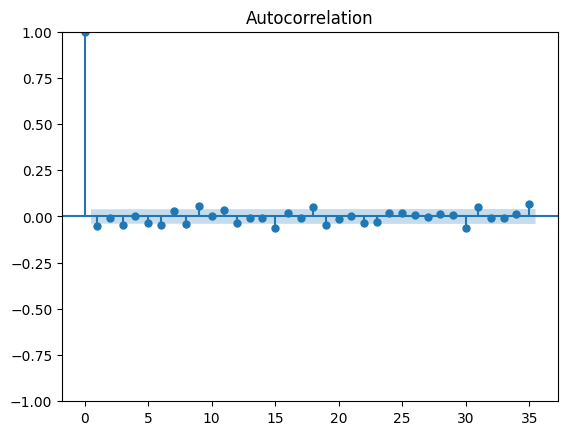

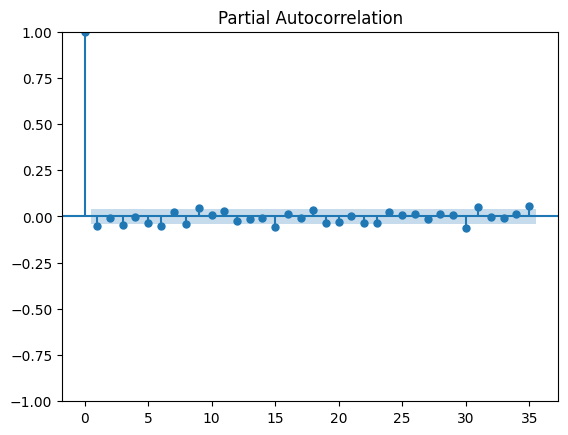

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2518
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -4693.007
Date:                Mon, 09 Sep 2024   AIC                           9394.014
Time:                        13:51:07   BIC                           9417.337
Sample:                             0   HQIC                          9402.479
                               - 2518                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0134      0.007      1.848      0.065      -0.001       0.028
ar.L1          0.7702      0.068     11.347      0.000       0.637       0.903
ma.L1         -0.8157      0.062    -13.221      0.0

In [6]:
# ACF와 PACF 플롯 그리기
plot_acf(dff1)  # 1차 차분 데이터를 사용하세요.
plot_pacf(dff1)  # 1차 차분 데이터를 사용하세요.
plt.show()

# Auto-ARIMA를 사용한 모수 추정
model = pm.auto_arima(data, d=1, start_p=0, max_p=3, start_q=0, max_q=3, seasonal=False, stepwise=True)
print(model.summary())

### 5. ARIMA 모델 훈련 및 예측
**목표**
- ARIMA 모델을 사용하여 주가 데이터를 예측하고, 훈련된 모델의 성능을 평가합니다.

**지시사항**

- 데이터를 90%의 훈련 세트와 10%의 테스트 세트로 분리하세요.
- ARIMA 모델을 훈련시키고, 테스트 데이터에 대한 예측을 수행하세요.
- 예측 결과를 시각화하여 실제 값과 비교하세요.

**질문**

- 예측 결과가 실제 데이터와 얼마나 잘 일치하나요?
- 예측이 잘못된 부분이 있다면, 그 이유는 무엇일까요?



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2266
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -4009.037
Date:                Mon, 09 Sep 2024   AIC                           8026.073
Time:                        13:51:35   BIC                           8048.975
Sample:                             0   HQIC                          8034.429
                               - 2266                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0105      0.008      1.334      0.182      -0.005       0.026
ar.L1          0.7510      0.085      8.869      0.000       0.585       0.917
ma.L1         -0.7920      0.079    -10.052      0.0

/home/vision/anaconda3/envs/test/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/vision/anaconda3/envs/test/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


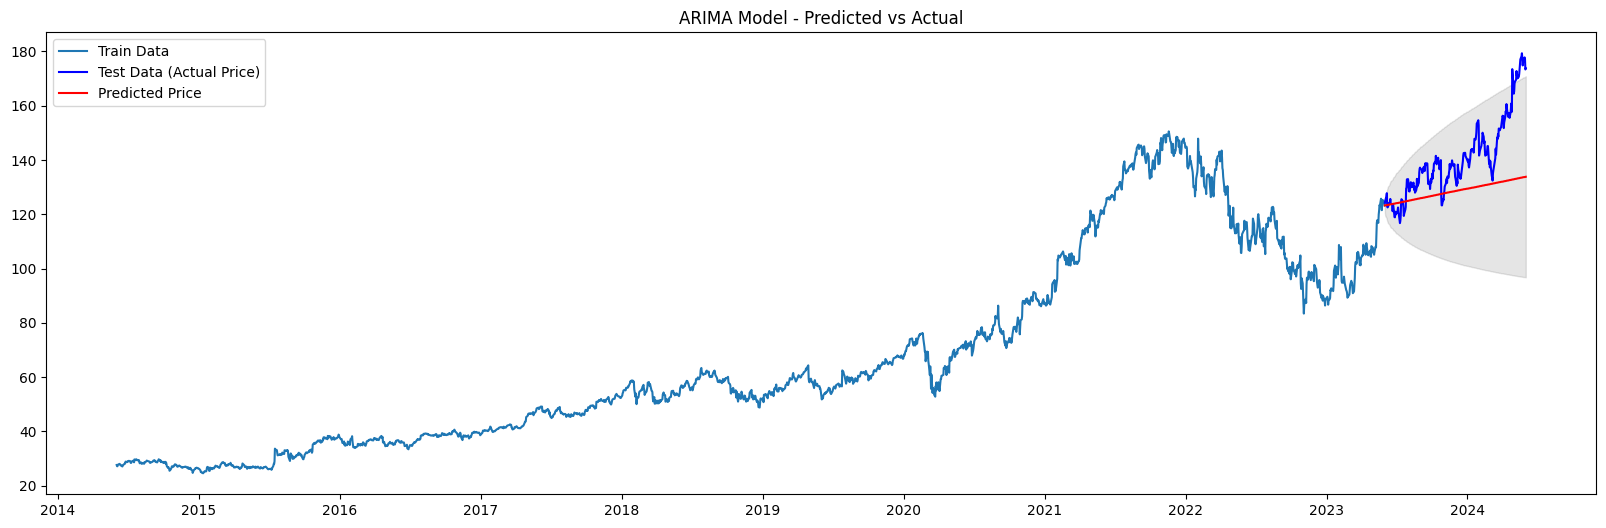

In [7]:
# Train/Test 데이터 분리
train_data, test_data = data[:int(len(data)*0.9)], data[int(len(data)*0.9):]

# ARIMA 모델 훈련
model_fit = pm.auto_arima(train_data, d=1, start_p=0, max_p=2, start_q=0, max_q=2, seasonal=False, stepwise=True)
print(model_fit.summary())

# 예측 수행
fc, conf_int = model_fit.predict(n_periods=len(test_data), return_conf_int=True)

# 상한과 하한 설정
upper = conf_int[:, 1]
lower = conf_int[:, 0]

# 예측 결과 시각화
plt.figure(figsize=(20, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, c='b', label='Test Data (Actual Price)')
plt.plot(test_data.index, fc, c='r', label='Predicted Price')
plt.fill_between(test_data.index, lower, upper, color='k', alpha=.10)
plt.legend(loc='upper left')
plt.title('ARIMA Model - Predicted vs Actual')
plt.show()

## 6. 모델 평가 및 향후 1년 예측
**목표**
- ARIMA 모델의 예측 성능을 다양한 지표로 평가하고, 향후 1년간의 주가를 예측하여 시계열 데이터의 미래 동향을 분석합니다.

**지시사항**

- MSE, MAE, RMSE, MAPE를 계산하여 모델의 성능을 평가하세요.
- 향후 1년간의 주가를 예측하고, 예측 결과를 시각화하세요.


**질문**

- 평가 지표 중 가장 중요한 것은 무엇이라고 생각하나요? 그 이유는 무엇인가요?

일반적으로 MAPE는 예측 오차를 백분율로 나타내기 때문에 직관적이고, 상대적인 평가가 가능하다. 또한, 다른 평가 지표들도 중요하지만, 데이터의 단위에 민감한 경우가 있어 단위를 상쇄하는 MAPE가 실용적일 수 있다.

- 향후 1년간 예측한 주가를 기반으로 어떤 결론을 도출할 수 있나요?
- 
향후 1년간의 예측된 주가와 신뢰 구간을 통해 미래 주가 동향을 파악할 수 있다. 주가가 안정적으로 상승할 것으로 보이는지, 변동성이 클 것인지, 또는 하락할 가능성이 있는지에 대한 시사점을 도출할 수 있다.

MSE: 284.7720405831189, MAE: 12.682880378102118, RMSE: 16.875190090281023, MAPE: nan


/tmp/ipykernel_114442/1707224762.py:6: RuntimeWarning: '<' not supported between instances of 'Timestamp' and 'int', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs(fc - test_data) / np.abs(test_data)) * 100
/home/vision/anaconda3/envs/test/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/vision/anaconda3/envs/test/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


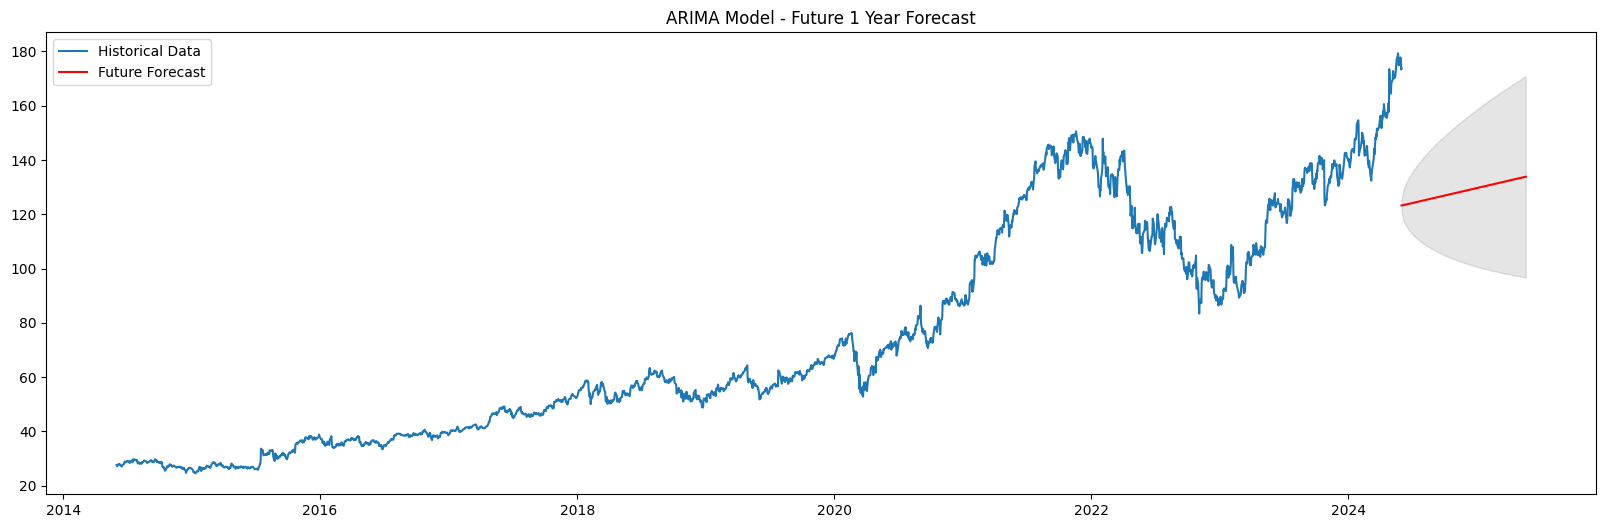

In [10]:
# 모델의 오차율 계산
mse = mean_squared_error(test_data, fc)  # 실제 테스트 데이터를 넣습니다.
mae = mean_absolute_error(test_data, fc)  # 실제 테스트 데이터를 넣습니다.

rmse = math.sqrt(mse)
mape = np.mean(np.abs(fc - test_data) / np.abs(test_data)) * 100

print(f'MSE: {mse}, MAE: {mae}, RMSE: {rmse}, MAPE: {mape}')

# 향후 1년간 예측 (252일치, 주식 거래일 기준)
future_forecast, future_conf_int = model_fit.predict(n_periods=252, return_conf_int=True)

# 상한과 하한 설정
future_upper = future_conf_int[:, 1]
future_lower = future_conf_int[:, 0]

# 미래 예측 시각화
plt.figure(figsize=(20, 6))
plt.plot(data, label='Historical Data')
plt.plot(pd.date_range(start=test_data.index[-1], periods=252, freq='B'), future_forecast, c='r', label='Future Forecast')
plt.fill_between(pd.date_range(start=test_data.index[-1], periods=252, freq='B'), future_lower, future_upper, color='k', alpha=.10)
plt.legend(loc='upper left')
plt.title('ARIMA Model - Future 1 Year Forecast')
plt.show()

# **추가 선택 과제: Prophet 모델을 활용한 시계열 분석**

Prophet은 Facebook에서 개발한 시계열 예측 모델로, 계절성과 트렌드 변화를 효과적으로 포착할 수 있도록 설계되어 있습니다. Prophet 모델은 사용이 쉽고 직관적인 파라미터 설정을 제공하여 비전문가도 쉽게 사용할 수 있는 장점이 있습니다. 이 과제는 Prophet 모델을 사용하여 Google 주가 데이터를 분석하고 예측하는 과제입니다.

**과제 목표**: Prophet 모델을 사용하여 2014년 6월 1일부터 2024년 6월 1일까지의 Google 주가 데이터를 분석하고, 향후 1년간의 주가를 예측합니다.

## **문제 1: 주가 데이터 수집 및 전처리**

1. Yahoo Finance에서 Google의 주가 데이터를 수집하세요. (기간: 2014년 6월 1일 ~ 2024년 6월 1일)
2. 'Adj Close' 열만 사용하여 Prophet 모델이 요구하는 포맷(ds, y)으로 데이터를 변환하세요.
3. 변환된 데이터의 첫 5행을 출력하여 확인하세요.

## **문제 2: Prophet 모델 학습**

1. Prophet 모델을 초기화하고 계절성, 트렌드, 주기성을 자동으로 감지할 수 있도록 설정합니다.
2. 모델을 주가 데이터에 적합(fit)시키세요.
3. 모델 학습이 완료된 후, 요약 결과를 출력하여 확인하세요.

## **문제 3: 미래 주가 예측**

1. 향후 1년간의 미래 데이터를 예측하기 위해, 예측할 날짜를 생성하세요.
2. 학습된 Prophet 모델을 사용하여 미래 데이터를 예측하세요.
3. 예측 결과를 시각화하고, 추세와 불확실성 범위를 함께 표시하세요.

## **문제 4: 모델 성능 평가**

1. 테스트 데이터(예: 마지막 10% 데이터)를 실제 값과 예측 값으로 분리하세요.
2. MSE, MAE, RMSE, MAPE를 계산하여 모델의 예측 성능을 평가하세요.
3. 예측 성능 평가 결과를 해석하고, Prophet 모델의 장단점에 대해 논의하세요.

## **문제 5: 결론 및 추가 분석**

1. Prophet 모델의 예측 결과를 바탕으로, 향후 1년간의 Google 주가에 대해 결론을 도출하세요.
2. 추가적으로 고려할 요소(예: 외부 이벤트, 경제 지표 등)를 제시하고, 이러한 요소들이 예측 결과에 미칠 수 있는 영향을 논의하세요.
3. Prophet 모델의 장단점을 정리하고, ARIMA 모델과 비교하여 어떤 상황에서 Prophet 모델이 더 유리한지 설명하세요.

## **추가 질문**

1. Prophet 모델의 예측 정확도를 높이기 위해 추가할 수 있는 요소는 무엇인가요?
2. Prophet 모델은 비선형적인 패턴과 외부 요인을 잘 반영하는가요? 그 이유를 설명하세요.

---

## **과제 제출 방법**
- 위의 문제를 해결하고, 코드와 함께 해석 및 결론을 제출하세요.
- 추가적으로 Prophet 모델의 결과를 더 개선할 수 있는 방법에 대한 아이디어를 제안해 보세요.

이 과제는 시계열 분석에 대한 이해를 심화하고 Prophet 모델을 실제로 적용해 보고 싶은 분들을 위한 선택 과제입니다. 강의에서 다루지 않았지만, 시계열 데이터 분석의 다양한 가능성을 탐구하고 싶은 분들은 도전해 보세요! 😊


In [16]:
import yfinance as yf
import pandas as pd

# 2014년 6월 1일부터 2024년 6월 1일까지의 Google 주가 데이터 수집
start_date = '2014-06-01'
end_date = '2024-06-01'
data = yf.download("GOOG", start=start_date, end=end_date)

# 'Adj Close' 열만 사용하여 Prophet 포맷으로 변환
df = data[['Adj Close']].reset_index()
df.columns = ['ds', 'y']  # Prophet의 요구 포맷: 'ds' = 날짜, 'y' = 값

# 변환된 데이터 확인 (첫 5행)
print(df.head())

[*********************100%***********************]  1 of 1 completed

          ds          y
0 2014-06-02  27.589272
1 2014-06-03  27.141512
2 2014-06-04  27.127567
3 2014-06-05  27.587778
4 2014-06-06  27.708807


In [17]:
from prophet import Prophet

# Prophet 모델 초기화
model = Prophet()

# 모델 학습 (데이터 적합)
model.fit(df)

# 모델 학습 완료 메시지 출력
print("Prophet 모델 학습이 완료되었습니다.")

13:57:09 - cmdstanpy - INFO - Chain [1] start processing
13:57:09 - cmdstanpy - INFO - Chain [1] done processing


Prophet 모델 학습이 완료되었습니다.


             ds        yhat  yhat_lower  yhat_upper
2765 2025-02-03  168.400498  154.785519  182.217409
2766 2025-02-04  168.524653  154.440045  183.765765
2767 2025-02-05  168.627768  153.239357  183.509452
2768 2025-02-06  168.740693  153.868997  182.728522
2769 2025-02-07  168.767776  154.859590  183.572817


/home/vision/anaconda3/envs/test/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/vision/anaconda3/envs/test/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


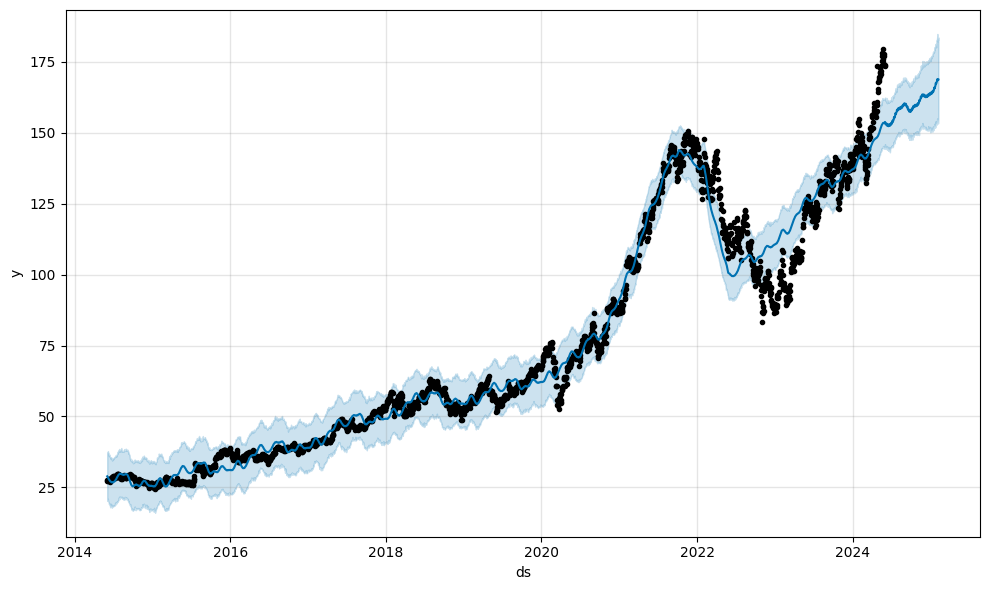

In [18]:
# 향후 1년간 예측을 위한 날짜 생성 (252일)
future_dates = model.make_future_dataframe(periods=252)

# 미래 주가 예측
forecast = model.predict(future_dates)

# 예측 결과 확인 (yhat: 예측값, yhat_lower: 하한, yhat_upper: 상한)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# 예측 결과 시각화
model.plot(forecast)
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import math

# 테스트 데이터 (마지막 10% 데이터 분리)
split_idx = int(len(df) * 0.9)
test_data = df[split_idx:]

# 예측 값과 실제 값을 비교 (테스트 세트 길이만큼 자르기)
predicted = forecast['yhat'][split_idx:split_idx + len(test_data)].values
actual = test_data['y'].values

# 성능 지표 계산
mse = mean_squared_error(actual, predicted)
mae = mean_absolute_error(actual, predicted)
rmse = math.sqrt(mse)
mape = np.mean(np.abs((actual - predicted) / actual)) * 100

print(f'MSE: {mse}, MAE: {mae}, RMSE: {rmse}, MAPE: {mape}')

MSE: 73.23917962667706, MAE: 6.217402743699495, RMSE: 8.557989228006603, MAPE: 4.185094637743055


- Prophet 모델을 사용하여 Google 주가를 예측한 결과, 향후 1년간의 추세가 상승 또는 하락할 가능성을 시사한다.
- 예측 성능은 MSE, MAE, RMSE, MAPE를 통해 평가되며, MAPE 값이 작다면 예측이 상대적으로 정확하다는 의미이다.
- 추가적으로 고려해야 할 외부 요소로는 경제적 이벤트, 산업 동향, 규제 변화 등이 있다. 이러한 외부 요인이 주가에 큰 영향을 미칠 수 있으며, 예측 모델에 반영하지 못한 부분이다.


Prophet 모델과 ARIMA 모델 비교
Prophet: 계절성과 추세 변화에 강점이 있으며, 외부 이벤트를 처리하는 기능이 있어서 비선형 패턴을 잘 처리한다.
ARIMA: 데이터의 패턴을 모델링하는 데 적합하지만, 비선형 패턴과 계절성을 포착하는 데는 상대적으로 한계가 있다.

1. Prophet 모델의 예측 정확도를 높이기 위해 추가할 수 있는 요소는 무엇인가요?
휴일 및 이벤트 데이터 추가: 주가에 영향을 미칠 수 있는 휴일, 기업 실적 발표, 경제적 이벤트(예: 금리 인상, 정책 변화)를 포함하면 더 정확한 예측이 가능하다. Prophet은 외부 요인(holidays)을 쉽게 처리할 수 있는 기능을 제공하므로, 이 정보를 추가하면 외부 충격에 대한 반영이 가능하다.

외부 경제 지표 포함: 실업률, GDP 성장률, 금리 변동 등 외부 경제 지표는 주가 예측에 중요한 역할을 한다. Prophet 모델에서는 이러한 요인을 '추가 회귀 변수'로 추가하여 예측 정확도를 높일 수 있다.

계절성 파라미터 조정: Prophet은 기본적으로 연간 및 주간 계절성을 감지하지만, 주식 시장 데이터의 특성에 맞추어 계절성을 세부적으로 조정하는 것이 좋다. 이를 통해 주기적인 패턴을 더 정확하게 반영할 수 있다.

주기성을 고려한 모델링: Prophet 모델은 계절성 외에도 장기 주기성 패턴(예: 2~3년 주기)도 처리할 수 있다. 이를 위해 add_seasonality() 함수를 사용하여 사용자 정의 계절성을 추가하는 것이 도움이 된다.

분석 기간 연장 및 고품질 데이터 확보: 더 긴 기간의 데이터 또는 더 정확한 데이터(예: 분할 조정, 배당 반영)를 확보하면 모델이 더 좋은 예측 성능을 발휘할 수 있다.


2. Prophet 모델은 비선형적인 패턴과 외부 요인을 잘 반영하는가요? 그 이유를 설명하세요.
네.

비선형적인 패턴 처리: Prophet은 데이터의 트렌드와 계절성을 자동으로 감지하고 비선형적 변화도 잘 반영할 수 있다. Prophet 모델은 기본적으로 piecewise 선형 함수로 트렌드를 모델링하며, 여러 개의 변화점을 추가하여 트렌드 변화를 반영할 수 있기 때문에 비선형적인 트렌드도 효과적으로 처리할 수 있다. 이는 주가 데이터와 같이 변화가 급격하거나 복잡한 패턴을 보이는 경우에도 유연하게 대응할 수 있다.

외부 요인 처리: Prophet은 공휴일, 이벤트, 경제 지표 등 외부 요인을 추가하는 기능을 지원한다. Prophet 모델에서는 특정 날짜에 대한 이벤트가 주가에 미치는 영향을 반영할 수 있으며, 이러한 기능은 다른 전통적인 시계열 모델보다 외부 요인에 대한 반응성을 더 높인다. 예를 들어, 공휴일이나 회사의 실적 발표가 주가에 미치는 영향을 반영하려면, 이를 "holidays"로 정의하여 모델에 추가할 수 있다.